In [1]:
from shapely import Point
import datetime
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from scipy.interpolate import griddata 
from mpl_toolkits.basemap import Basemap

from simulator.disasters.generic.earthquake import Earthquake


/Users/andreaparra/Virtual-Envs/python_3.9/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-9d86893cf7f1>:6: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are usi

In [2]:
gdf_panama = gpd.read_file("/Users/andreaparra/Dropbox/4_Work/data/shapefiles/panama/gadm41_PAN_shp/gadm41_PAN_2.shp")
gdf_panama.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PAN.1.1_1,PAN,Panama,PAN.1_1,Bocas del Toro,NA,Bocas del Toro,NA,NA,Distrito,District,NA,PA.BC.BT,"MULTIPOLYGON (((-82.25736 9.16431, -82.25708 9..."
1,PAN.1.2_1,PAN,Panama,PAN.1_1,Bocas del Toro,NA,Changuinola,NA,NA,Distrito,District,NA,PA.BC.CH,"MULTIPOLYGON (((-82.76650 8.99789, -82.76719 8..."
2,PAN.1.3_1,PAN,Panama,PAN.1_1,Bocas del Toro,NA,Chiriquí Grande,NA,NA,Distrito,District,NA,PA.BC.CG,"MULTIPOLYGON (((-82.07708 8.92347, -82.07653 8..."
3,PAN.2.1_1,PAN,Panama,PAN.2_1,Chiriquí,NA,Alanje,NA,NA,Distrito,District,NA,PA.CH.AL,"POLYGON ((-82.52854 8.39068, -82.52721 8.39094..."
4,PAN.2.2_1,PAN,Panama,PAN.2_1,Chiriquí,NA,Barú,NA,NA,Distrito,District,NA,PA.CH.BR,"MULTIPOLYGON (((-82.88042 8.01931, -82.88042 8..."


In [3]:
start_date_str = '2023-03-01 13:55:26'

start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S')

earthquake = Earthquake(id="panama", epicenter=(8.360193, -82.869058), 
                        start_date=start_date)

In [4]:
earthquake.generate_disaster(A0=10, vxy=(1, 1), steps=72, method='exponential', step_unit='hr')


In [5]:
# extracts one instant in the disaster -> a function describing the disaster at that point
t_0 = earthquake.disaster_functions()[0]
t_0

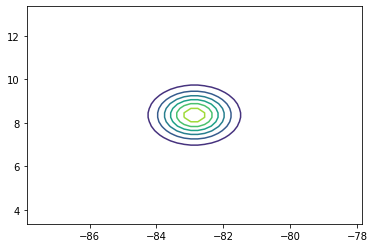

In [6]:
gdf = t_0.generate_geopandas()

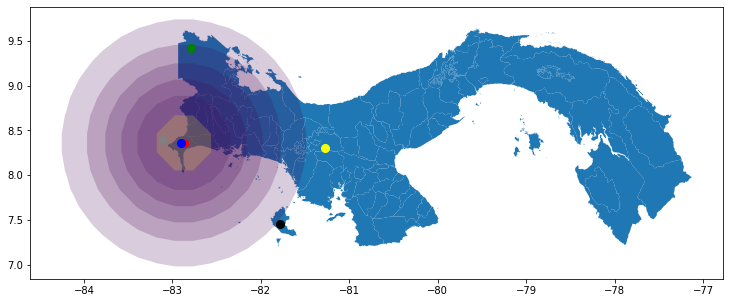

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

# Points in shapely are Point(lon, lat)
pois = [Point(-82.869058, 8.360193), Point(-82.787767, 9.415969),  Point(-82.896869, 8.363514), 
        Point(-83.108523, 8.397710), Point(-81.274001, 8.302333), Point(-81.782823, 7.451571)]
colors = ["red", "green", "blue", "grey", "yellow", "black"]
gdf_panama.plot(ax=ax)
gdf.plot(column="intensity", ax=ax, alpha=0.2)
for idx, poi in enumerate(pois):
    ax.plot(poi.x, poi.y, color=colors[idx], marker='o',  markersize=8)


In [8]:
# List of directions at every point
directions = t_0.direction(pois)
directions

[0.0,
 4.344000662116514,
 276.8841186175392,
 279.01609215692866,
 91.98390485624623,
 130.10572050664695]

In [10]:
# List of bearings (degrees) at every point
intensities = t_0.intensity(pois)
intensities

[10.0,
 3.2586529489338627,
 9.99215826862586,
 9.429415215123937,
 0.7827283955533144,
 1.3459292664123554]